<a href="https://colab.research.google.com/github/karginb/classifications_with_tensorflow/blob/main/02_neural_network_classification_in__tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with TensorFlow

* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.

* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.
Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.







## What we're going to cover
* Architecture of a classification model

* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
     * "What class do the inputs belong to?"

* Creating custom data to view and fit

* Steps in modelling for binary and mutliclass classification
  * Creating a model
  * Compiling a model
   * Defining a loss function
   * Setting up an optimizer
     * Finding the best learning rate
   * Creating evaluation metrics
* Fitting a model (getting it to find patterns in our data)
* Improving a model
* The power of non-linearity
* Evaluating classification models
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)

## Typical architecture of a classification neural network
* An input layer.
* Some hidden layers.
* An output layer.


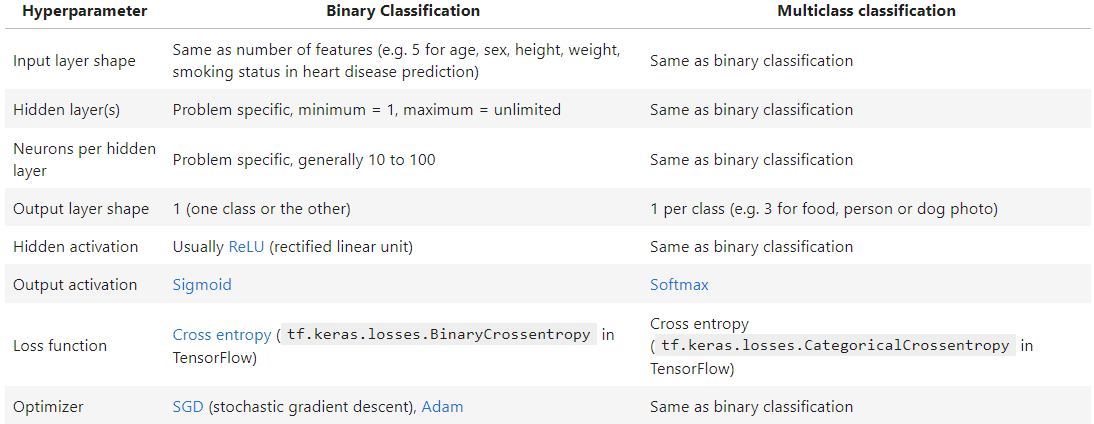

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view and fit

It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).



In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)




In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

Alright, looks like we're dealing with a binary classification problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called multiclass classification.

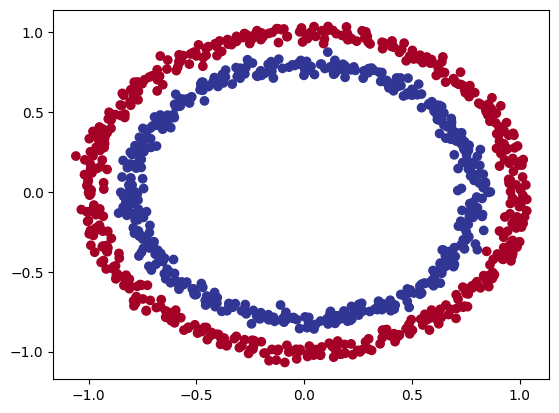

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0], y = X[:,1], c = y, cmap = plt.cm.RdYlBu)
plt.show()

**We gained our data and visualized. Now let's dive into deep!!!**

## Input and output shapes
One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value.

 **Note:** y having a shape of (1000,) can seem confusing. However, this is because all y values are actually scalars (single values) and therefore don't have a dimension. For now, think of your output shape as being at least the same value as one example of y (in our case, the output from our neural network has to be at least one value).

## Steps in modelling
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1.Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).

2.Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

3.Fitting a model - letting the model try to find patterns in the data (how does X get to y)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()

model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 12s 5ms/step - loss: 6.3682 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 6.3231 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 6.2663 - accuracy: 0.4840
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 6.2187 - accuracy: 0.4850
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 6.1014 - accuracy: 0.5090


In [ ]:
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

What if we added an extra layer and trained for a little longer?

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

model_2.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_2.evaluate(X,y)
# Our model can be better. Let's do it!

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

1.Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2.Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

3.Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()

model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(1))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X, y, epochs = 100, verbose = 1)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 3.6741 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2931 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7449 - accuracy: 0.4930
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.4420
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4800
Epoch 11/

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.


To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).

* Creates a meshgrid of the different X values.

* Makes predictions across the meshgrid.

* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))


  x_in = np.c_[xx.ravel(), yy.ravel()]


  y_pred = model.predict(x_in)


  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)


  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()





313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


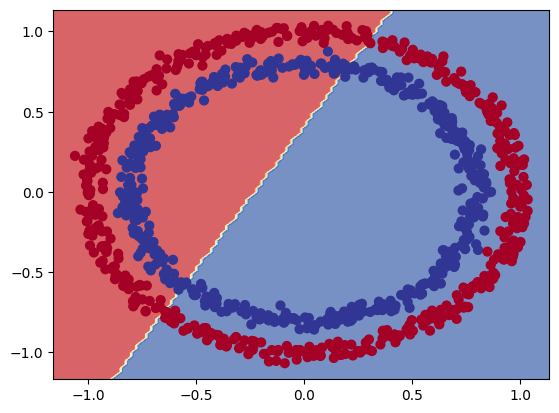

In [ ]:
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [ ]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis = -1),
            y_reg_train, epochs = 100)

Epoch 1/100


ValueError: ignored

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()

model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis = -1),
            y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 558.3500 - mae: 558.3500
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 446.1569 - mae: 446.1569
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 338.7864 - mae: 338.7864
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 227.6784 - mae: 227.6784
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 112.1551 - mae: 112.1551
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 54.7282 - mae: 54.7282
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 81.3639 - mae: 81.3639
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 65.0433 - mae: 65.0433
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 44.9850 - mae: 44.9850
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 51.3435 - mae: 51.3435
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 4ms/step


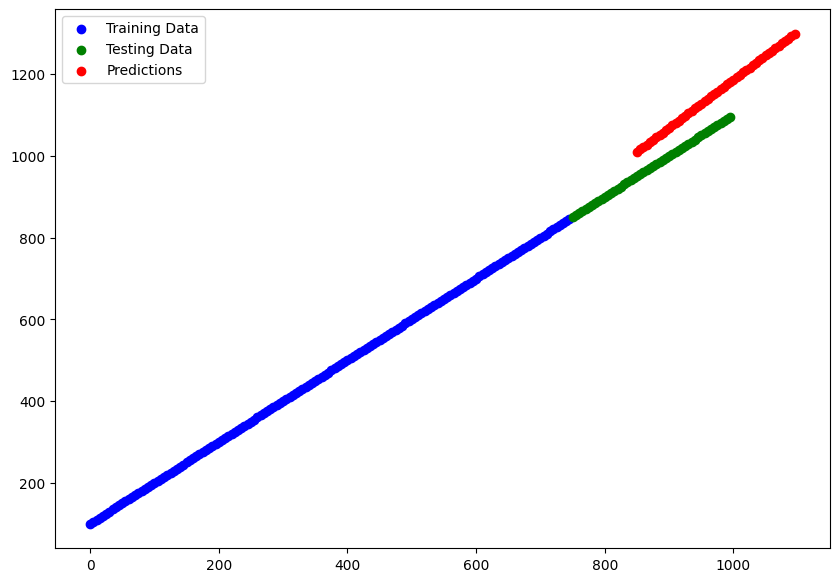

In [ ]:
# Okay, it seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.
y_reg_preds = model_3.predict(y_reg_test)

plt.figure(figsize = (10,7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Testing Data")
plt.scatter(y_reg_test, y_reg_preds, c = "r", label = "Predictions")
plt.legend()
plt.show()

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

## The missing piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

In [ ]:
#The main change we'll add to models we've built before is the use of the activation keyword.

tf.random.set_seed(42)

model_4 = tf.keras.Sequential()

model_4.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))
model_4.add(tf.keras.layers.Dense(1))

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_4.fit(X, y, epochs = 100)



Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2701 - accuracy: 0.4230
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1441 - accuracy: 0.4130
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0457 - accuracy: 0.4290
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9886 - accuracy: 0.4360
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9138 - accuracy: 0.4340
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7775 - accuracy: 0.4350
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6868 - accuracy: 0.4350
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5475 - accuracy: 0.4330
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.2946 - accuracy: 0.4290
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.0226 - accuracy: 0.4260
Epoch 11/

Okay, our model performs a little worse than guessing.

Let's remind ourselves what our data looks like.

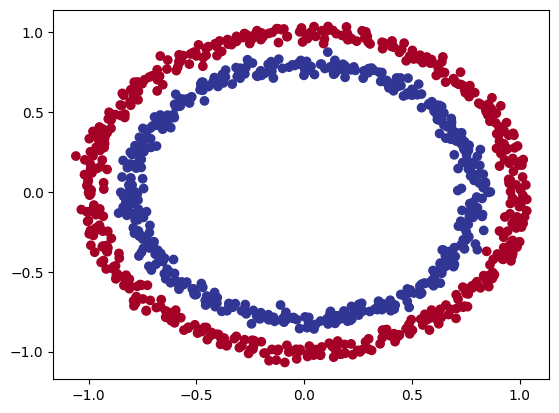

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu)
plt.show()

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


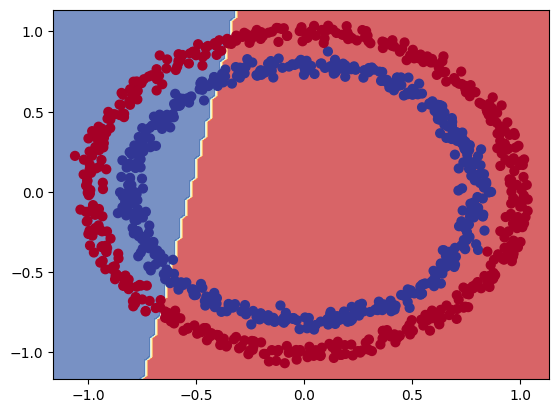

In [ ]:
plot_decision_boundary(model_4, X, y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential()

model_5.add(tf.keras.layers.Dense(1, tf.keras.activations.relu))
model_5.add(tf.keras.layers.Dense(1))

model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history = model_5.fit(X, y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 1.7963 - accuracy: 0.4430
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 1.4234 - accuracy: 0.4480
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 1.3394 - accuracy: 0.4500
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 1.2798 - accuracy: 0.4560
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 1.2333 - accuracy: 0.4550
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 1.1950 - accuracy: 0.4550
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1624 - accuracy: 0.4540
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 1.1332 - accuracy: 0.4570
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 1.1072 - accuracy: 0.4560
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 1.0828 - accuracy: 0.4560
Epoch 11/

In [ ]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931803226470947, 0.5]

Hmm... still not learning...

What we if increased the number of neurons and layers?



In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential()

model_6.add(tf.keras.layers.Dense(4, tf.keras.activations.relu))
model_6.add(tf.keras.layers.Dense(4, tf.keras.activations.relu))
model_6.add(tf.keras.layers.Dense(1))

model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

model_6.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 3.3605 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 1.5433 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 1.3449 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 1.3008 - accuracy: 0.4320
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2630 - accuracy: 0.4210
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2290 - accuracy: 0.4410
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1976 - accuracy: 0.4540
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1660 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1342 - accuracy: 0.4640
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.4590
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.6590


[0.6461436152458191, 0.6589999794960022]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


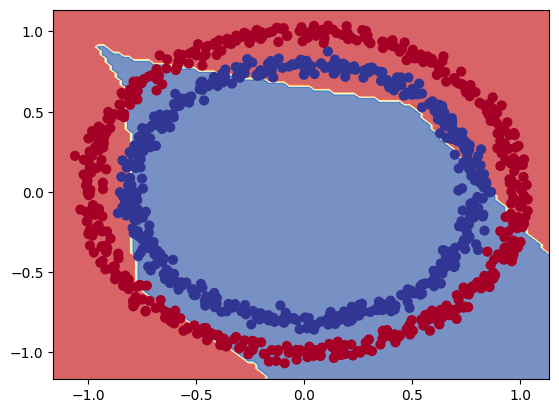

In [ ]:
plot_decision_boundary(model_6, X, y)

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential()

model_7.add(tf.keras.layers.Dense(4, tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(4, tf.keras.activations.relu))
model_7.add(tf.keras.layers.Dense(1, tf.keras.activations.sigmoid))

model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


model_7.fit(X, y, epochs = 100, verbose = 0 )


In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2317 - accuracy: 0.9950


[0.23168128728866577, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


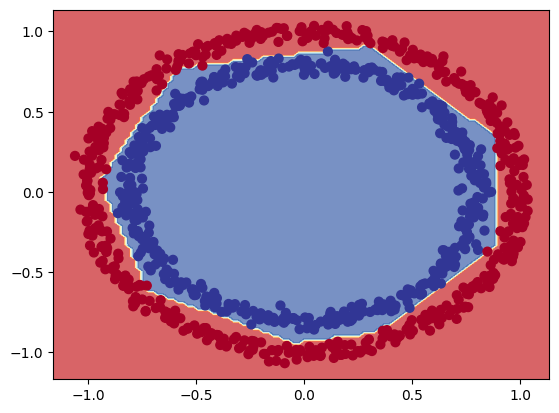

In [ ]:
plot_decision_boundary(model_7, X, y)

🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
A = tf.cast(tf.range(-10,10), dtype = tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

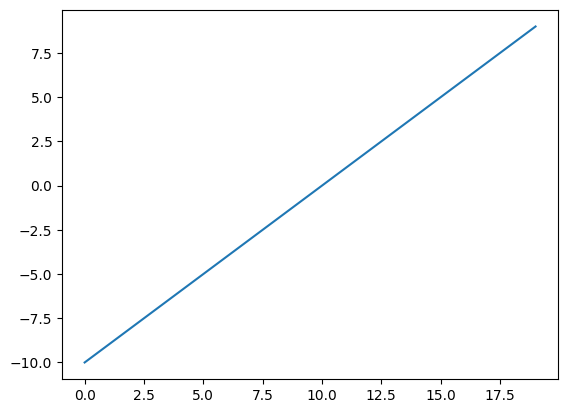

In [ ]:
plt.plot(A)

A straight line!

Now,let's look at how look activation function we've used.

In [ ]:
#SİGMOİD
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

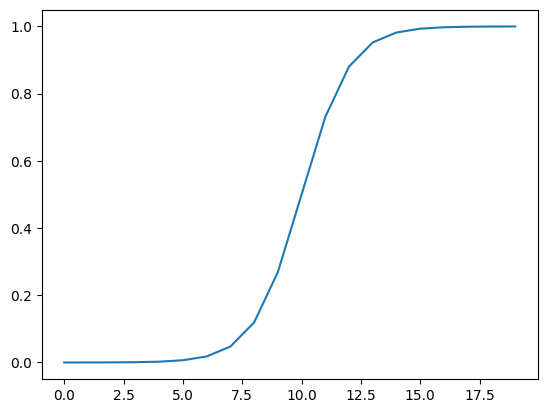

In [ ]:
plt.plot(sigmoid(A))
plt.show()

In [ ]:
# ReLU
def relu(x):
  return(tf.maximum(x, 0))

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

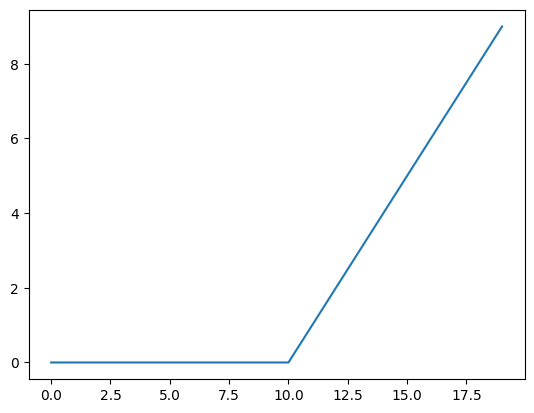

In [ ]:
plt.plot(relu(A))
plt.show()

In [ ]:
# LİNEAR
linear = tf.keras.activations.linear(A)

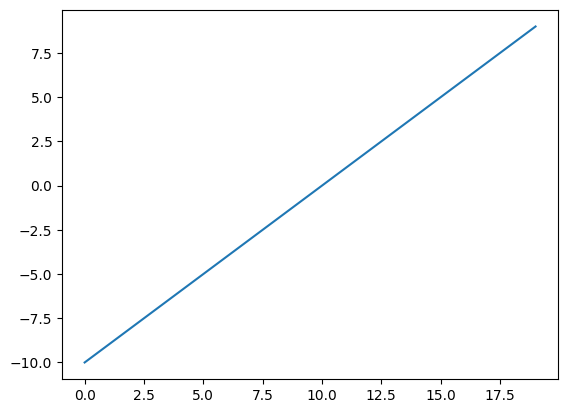

In [ ]:
plt.plot(linear)
plt.show()

In [ ]:
A == linear

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

Now rather than dive into the guts of neural networks, we're going to keep coding applying what we've learned to different problems but if you want a more in-depth look at what's going on behind the scenes, check out the Extra Curriculum section below.

## Evaluating and improving our classification model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [ ]:
len(X)

1000

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential()

model_8.add(tf.keras.layers.Dense(4, activation = "relu"))
model_8.add(tf.keras.layers.Dense(4, activation = "relu"))
model_8.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6952 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5025
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5863
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6812
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.5987
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.7538
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.7937
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.8388
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.8888
Epoch 11/25
25/25 [

In [ ]:
loss,accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")


7/7 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.9800
Model loss on the test set: 0.09721029549837112
Model accuracy on the test set: 98.00%


100% accuracy? Nice!

Now, when we started to create model_8 we said it was going to be the same as model_7 but you might've found that to be a little lie.

That's because we changed a few things:

* The activation parameter - We used strings ("relu" & "sigmoid") instead of using library paths (tf.keras.activations.relu), in TensorFlow, they both offer the same functionality.

* The learning_rate (also lr) parameter - We increased the learning rate parameter in the Adam optimizer to 0.01 instead of 0.001 (an increase of 10x).
   * You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.

* The number of epochs - We lowered the number of epochs (using the epochs parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
  *  One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

We know our model is performing well based on the evaluation metrics but let's see how it performs visually.

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


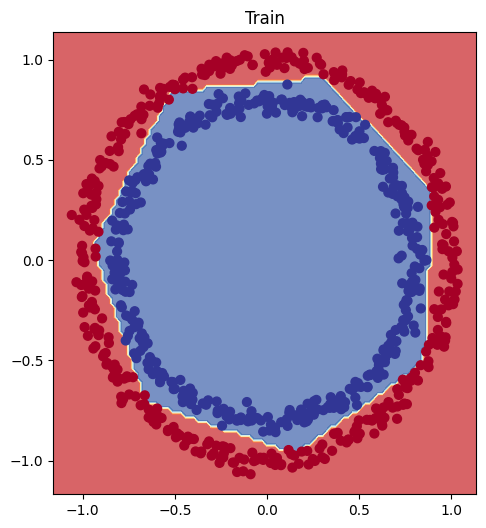

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


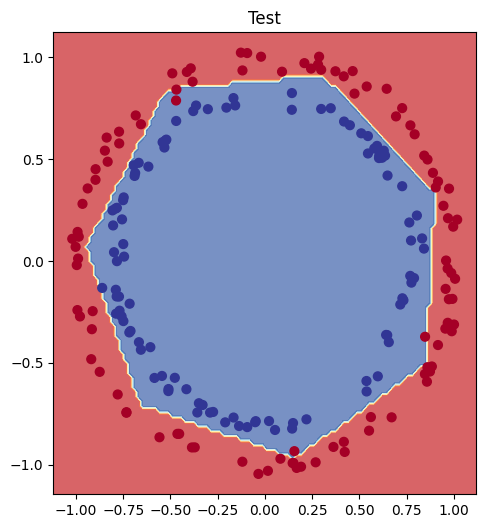

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss curves
Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves).

You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.695151,0.48250
1,0.690026,0.50250
2,0.684687,0.55125
3,0.677527,0.58625
4,0.667277,0.68125
5,0.649370,0.59875
6,0.622230,0.75375
7,0.590829,0.79375
8,0.539466,0.83875
9,0.481705,0.88875


Text(0.5, 1.0, 'Model_8 training curves')

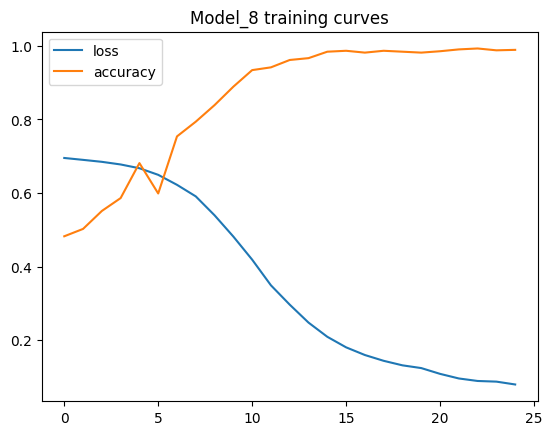

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of 0.001 (default) to 0.01.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

* A learning rate callback.
  *  You can think of a callback as an extra piece of functionality you can add to your model while its training.

* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential()

model_9.add(tf.keras.layers.Dense(4, activation = "relu"))
model_9.add(tf.keras.layers.Dense(4, activation = "relu"))
model_9.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model_9.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

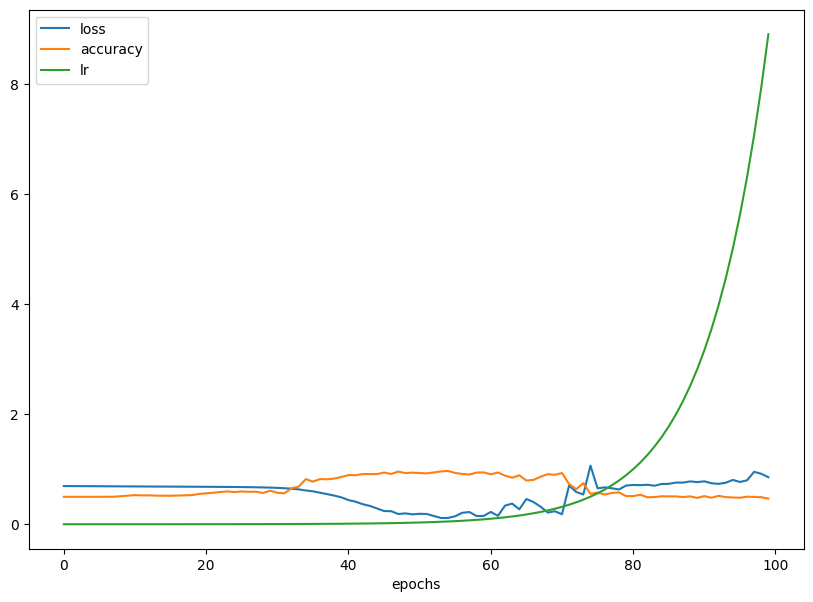

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7), xlabel = "epochs")

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

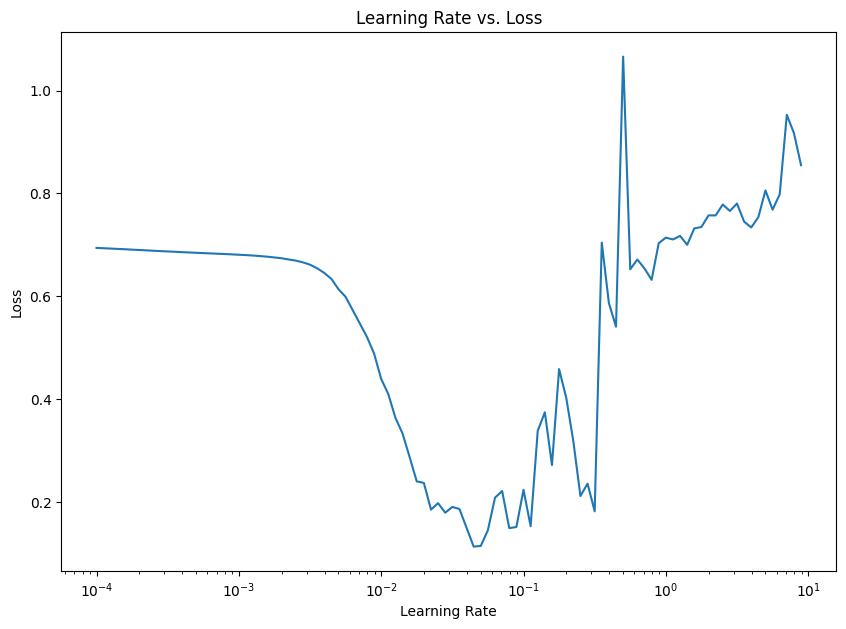

In [ ]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")
plt.show()

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 (
) and 0.02.

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.
tf.random.set_seed(42)

model_10 = tf.keras.Sequential()

model_10.add(tf.keras.layers.Dense(4, activation = "relu"))
model_10.add(tf.keras.layers.Dense(4, activation = "relu"))
model_10.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model_10.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ["accuracy"])

history = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6967 - accuracy: 0.4837
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5150
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5487
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.5950
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.5962
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6187
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.6550
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.6762
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.6925
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.6750
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8300


[0.43071773648262024, 0.8299999833106995]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


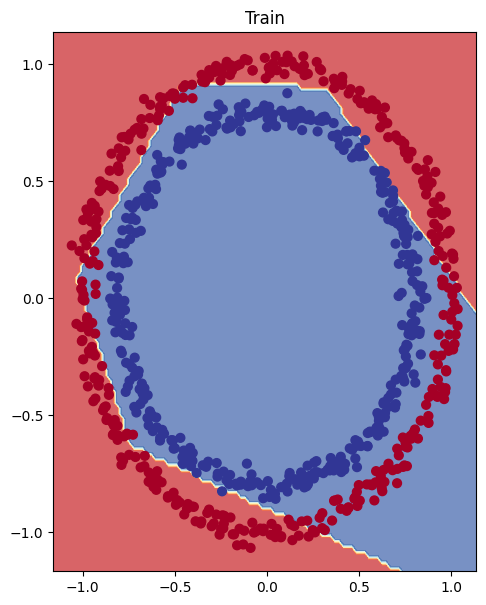

313/313 [==============================] - 2s 6ms/step
doing binary classifcation...


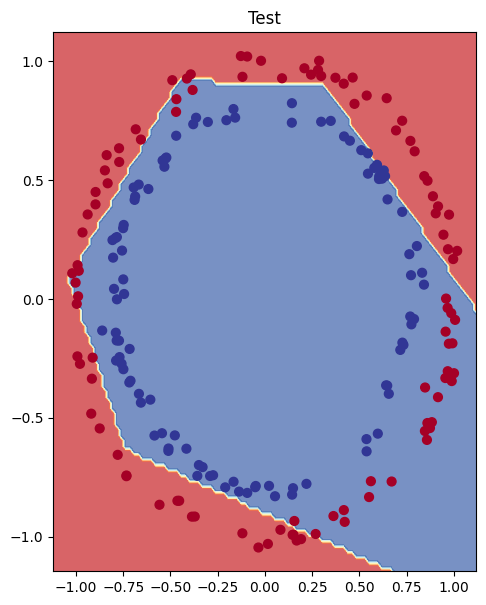

In [ ]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

And as we can see, almost perfect again.

These are the kind of experiments you'll be running often when building your own models.

Start with default settings and see how they perform on your data.

And if they don't perform as well as you'd like, improve them.

Let's look at a few more ways to evaluate our classification models.

## More classification evaluation methods

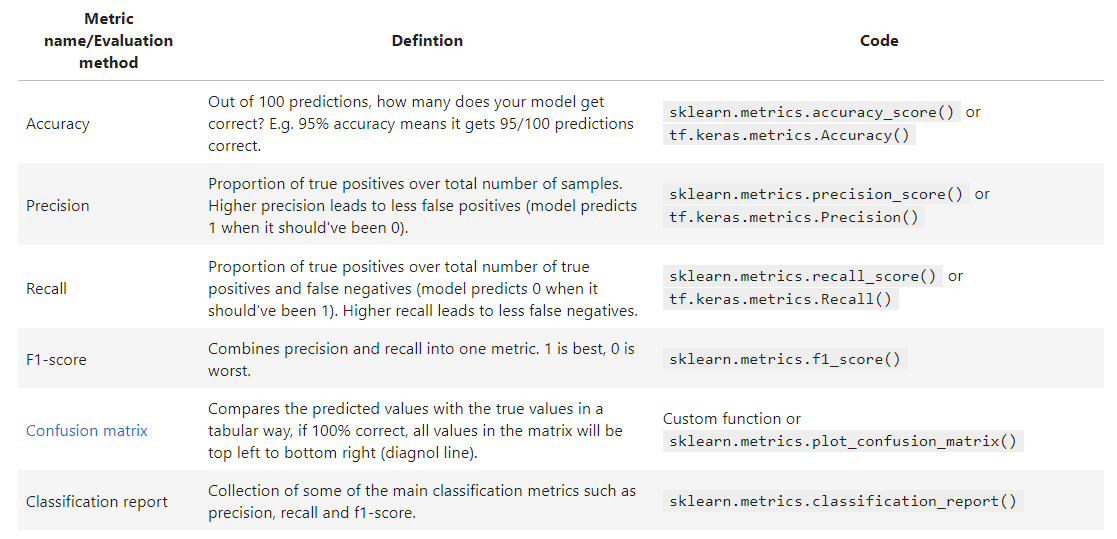Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

Because we passed ["accuracy"] to the metrics parameter when we compiled our model, calling evaluate() on it will return the loss as well as accuracy.

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8300
Model loss on test set: 0.43071773648262024
Model accuracy on test set: 83.00%


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

It seems our predictions aren't in the format they need to be.

Let's check them out.

In [ ]:
y_preds[:10]

array([[0.6348006 ],
       [0.79231954],
       [0.79231954],
       [0.79231954],
       [0.16108954],
       [0.6132688 ],
       [0.79231954],
       [0.45019624],
       [0.79231954],
       [0.0366243 ]], dtype=float32)

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called prediction probabilities.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[68, 33],
       [ 1, 98]])

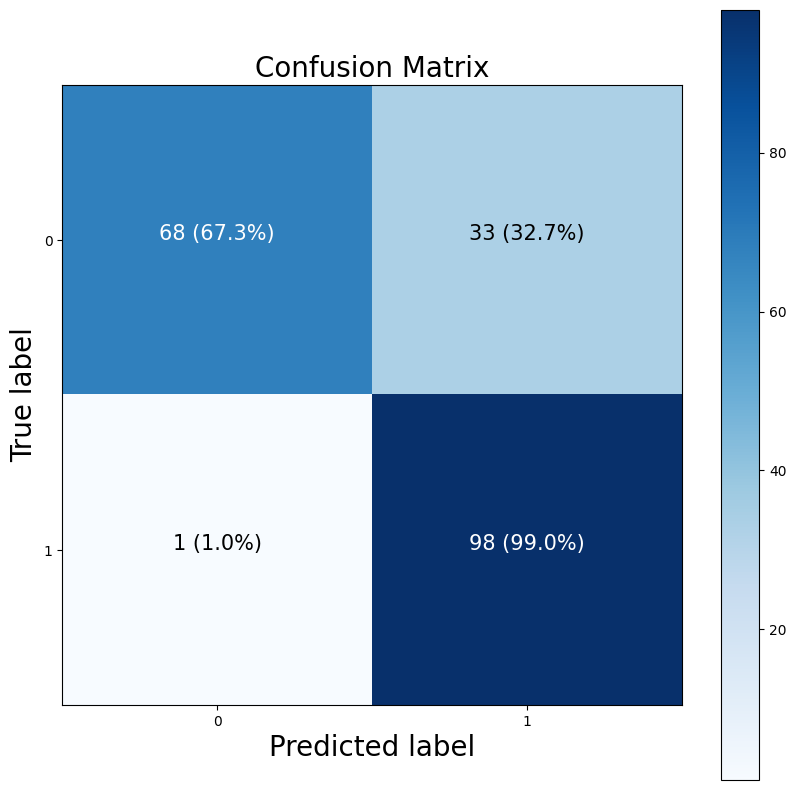

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
import itertools

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


## Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

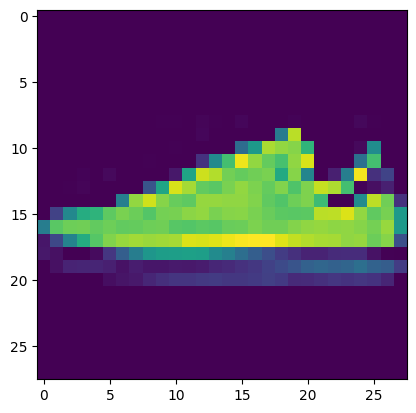

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[6])
plt.show()

In [ ]:
train_labels[6]

7

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on the dataset's GitHub page).

🔑 Note: Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

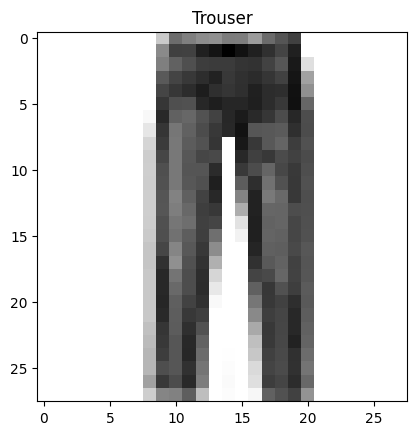

In [ ]:
plt.imshow(train_data[16], cmap = plt.cm.binary)
plt.title(class_names[train_labels[16]])
plt.show()

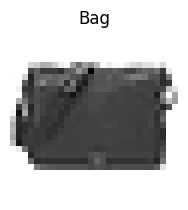

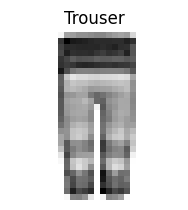

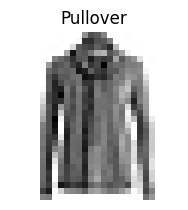

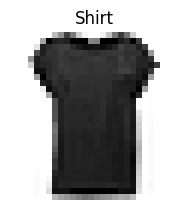

In [ ]:
import random

for i in range(4):
  ax = plt.subplot(2, 2, 1 + i)
  rand_index = random.choice(range(len(train_data)))
  ax = plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis("off")
  plt.show()

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
   * We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
   * We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
   * More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().

* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model_11.add(tf.keras.layers.Dense(4, activation = "relu"))
model_11.add(tf.keras.layers.Dense(4, activation = "relu"))
model_11.add(tf.keras.layers.Dense(10, activation = "softmax"))

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

non_norm_history = model_11.fit(train_data, train_labels, epochs = 10 , validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 2.5836 - accuracy: 0.0977 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3043 - val_accur

In [ ]:
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Alright, our model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classification problem.

Which is better than guessing (guessing with 10 classes would result in about 10% accuracy) but we can do better.

Do you remember when we talked about neural networks preferring numbers between 0 and 1? (if not, treat this as a reminder)

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the non_norm_history variable when calling fit()). It's pixel values are between 0 and 255.

In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential()
model_12.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model_12.add(tf.keras.layers.Dense(4, activation = "relu"))
model_12.add(tf.keras.layers.Dense(4, activation = "relu"))
model_12.add(tf.keras.layers.Dense(10, activation = "softmax"))

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_history = model_12.fit(train_data, train_labels, epochs = 10 , validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6459 - accuracy: 0.3395 - val_loss: 1.3938 - val_accuracy: 0.3820
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2556 - accuracy: 0.4907 - val_loss: 1.0842 - val_accuracy: 0.6014
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9983 - accuracy: 0.6294 - val_loss: 0.9494 - val_accuracy: 0.6498
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8946 - accuracy: 0.6700 - val_loss: 0.8498 - val_accuracy: 0.6885
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8122 - accuracy: 0.7058 - val_loss: 0.8004 - val_accuracy: 0.7119
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7771 - accuracy: 0.7218 - val_loss: 0.7815 - val_accuracy: 0.7249
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7605 - accuracy: 0.7293 - val_loss: 0.7741 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

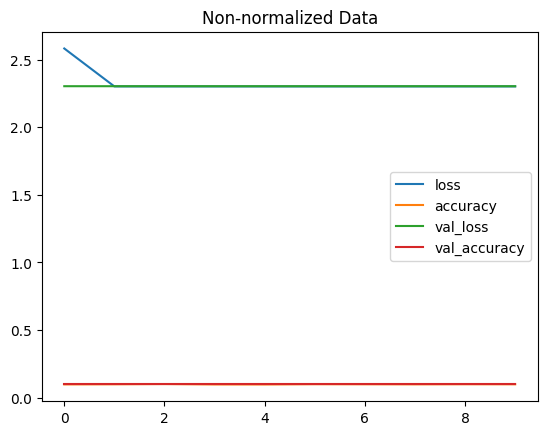

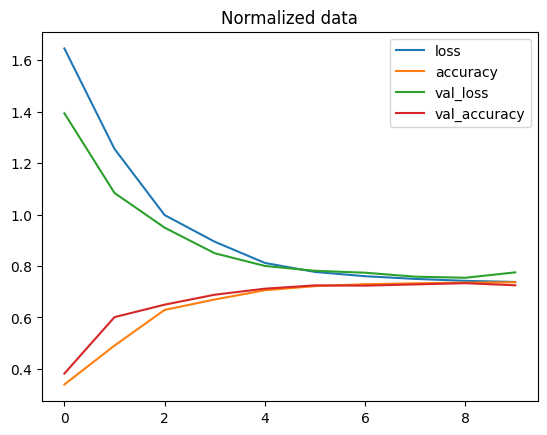

In [ ]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential()
model_13.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model_13.add(tf.keras.layers.Dense(4, activation = "relu"))
model_13.add(tf.keras.layers.Dense(4, activation = "relu"))
model_13.add(tf.keras.layers.Dense(10, activation = "softmax"))

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data, train_labels, epochs = 10 , validation_data = (test_data, test_labels), callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1647 - accuracy: 0.6113 - val_loss: 0.7781 - val_accuracy: 0.7395 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6817 - accuracy: 0.7665 - val_loss: 0.6632 - val_accuracy: 0.7722 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6200 - accuracy: 0.7794 - val_loss: 0.6334 - val_accuracy: 0.7766 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5922 - accuracy: 0.7847 - val_loss: 0.6135 - val_accuracy: 0.7808 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5768 - accuracy: 0.7894 - val_loss: 0.6237 - val_accuracy: 0.7771 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5629 - accuracy: 0.7979 - val_loss: 0.5972 - val_accuracy: 0.7897 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6

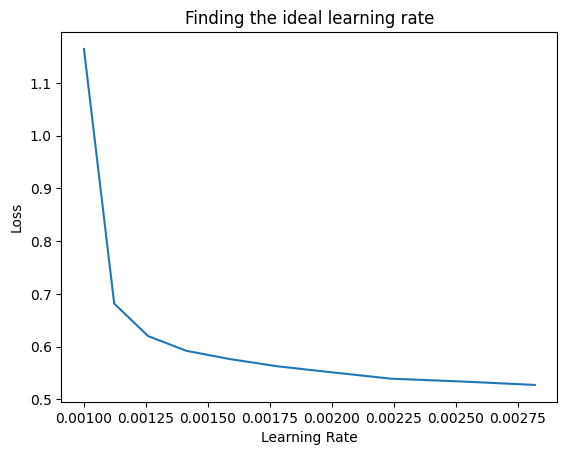

In [ ]:
lrs = 1e-3 * (10**(np.arange(10)/20))
plt.plot(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.show()


In [ ]:
find_lr_history.history["loss"]

[1.1647049188613892,
 0.6816971898078918,
 0.6200428009033203,
 0.5922225713729858,
 0.576762855052948,
 0.5628913044929504,
 0.5515826344490051,
 0.5392690300941467,
 0.5341996550559998,
 0.5274608135223389]

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential()

model_14.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model_14.add(tf.keras.layers.Dense(4, activation = "relu"))
model_14.add(tf.keras.layers.Dense(4, activation = "relu"))
model_14.add(tf.keras.layers.Dense(10, activation = "softmax"))

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])


history = model_14.fit(train_data,
                       train_labels,
                       epochs = 20,
                       validation_data = (test_data, test_labels))




Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4001 - accuracy: 0.5093 - val_loss: 1.0543 - val_accuracy: 0.6243
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9214 - accuracy: 0.6672 - val_loss: 0.8506 - val_accuracy: 0.6863
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7984 - accuracy: 0.7060 - val_loss: 0.7862 - val_accuracy: 0.7192
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7408 - accuracy: 0.7275 - val_loss: 0.7521 - val_accuracy: 0.7276
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7043 - accuracy: 0.7403 - val_loss: 0.7051 - val_accuracy: 0.7348
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6769 - accuracy: 0.7503 - val_loss: 0.7196 - val_accuracy: 0.7403
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6598 - accuracy: 0.7572 - val_loss: 0.6722 - val_accuracy:

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
Assess some of its predictions (through visualizations).
Improve its accuracy (by training it for longer or changing the architecture).
Save and export it for use in an application.
Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.



In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Since a confusion matrix compares the truth labels (test_labels) to the predicted labels, we have to make some predictions with our model.

In [ ]:
y_probs = model_14.predict(test_data)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.36782147e-07, 4.63460879e-08, 4.45420784e-10, 5.08106439e-07,
        2.99290304e-09, 2.16921166e-01, 2.29124408e-09, 3.20389792e-02,
        8.51013174e-05, 7.50953555e-01],
       [1.56958192e-03, 1.41676128e-06, 5.65070271e-01, 3.74014885e-03,
        3.40398014e-01, 6.15734948e-13, 8.91239122e-02, 8.84926703e-05,
        8.22267521e-06, 3.52447021e-16],
       [5.97418053e-04, 9.98669744e-01, 6.85410662e-09, 7.32612389e-04,
        1.23770591e-10, 3.55324638e-28, 2.02159427e-07, 0.00000000e+00,
        2.84911851e-13, 0.00000000e+00],
       [1.01351034e-04, 9.91788328e-01, 1.15857377e-08, 8.11028667e-03,
        1.79812309e-09, 7.62781984e-28, 8.61560849e-08, 0.00000000e+00,
        1.11873369e-12, 0.00000000e+00],
       [1.78285509e-01, 1.21603743e-03, 1.15988702e-01, 4.43689488e-02,
        7.64159635e-02, 5.03281028e-10, 5.78897774e-01, 2.63356581e-09,
        4.82706772e-03, 2.96957284e-16]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis = 1)


y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 8, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[751,   0,   8,  83,   8,   0, 123,   0,  27,   0],
       [  6, 906,   3,  68,   9,   0,   7,   0,   1,   0],
       [ 14,   0, 557,  32, 294,   0,  91,   0,  12,   0],
       [ 21,   4,   8, 873,  56,   0,  29,   0,   9,   0],
       [  1,   0, 261,  62, 481,   0, 186,   0,   9,   0],
       [  0,   0,   0,   0,   0, 879,   1,  53,   3,  64],
       [129,   0,  77,  63, 191,   0, 491,   0,  49,   0],
       [  0,   0,   0,   0,   0,  38,   0, 910,   6,  46],
       [  2,   1,   1,   5,   6,   1,  20,  10, 948,   6],
       [  0,   0,   0,   0,   0,  31,   0,  41,  11, 917]])

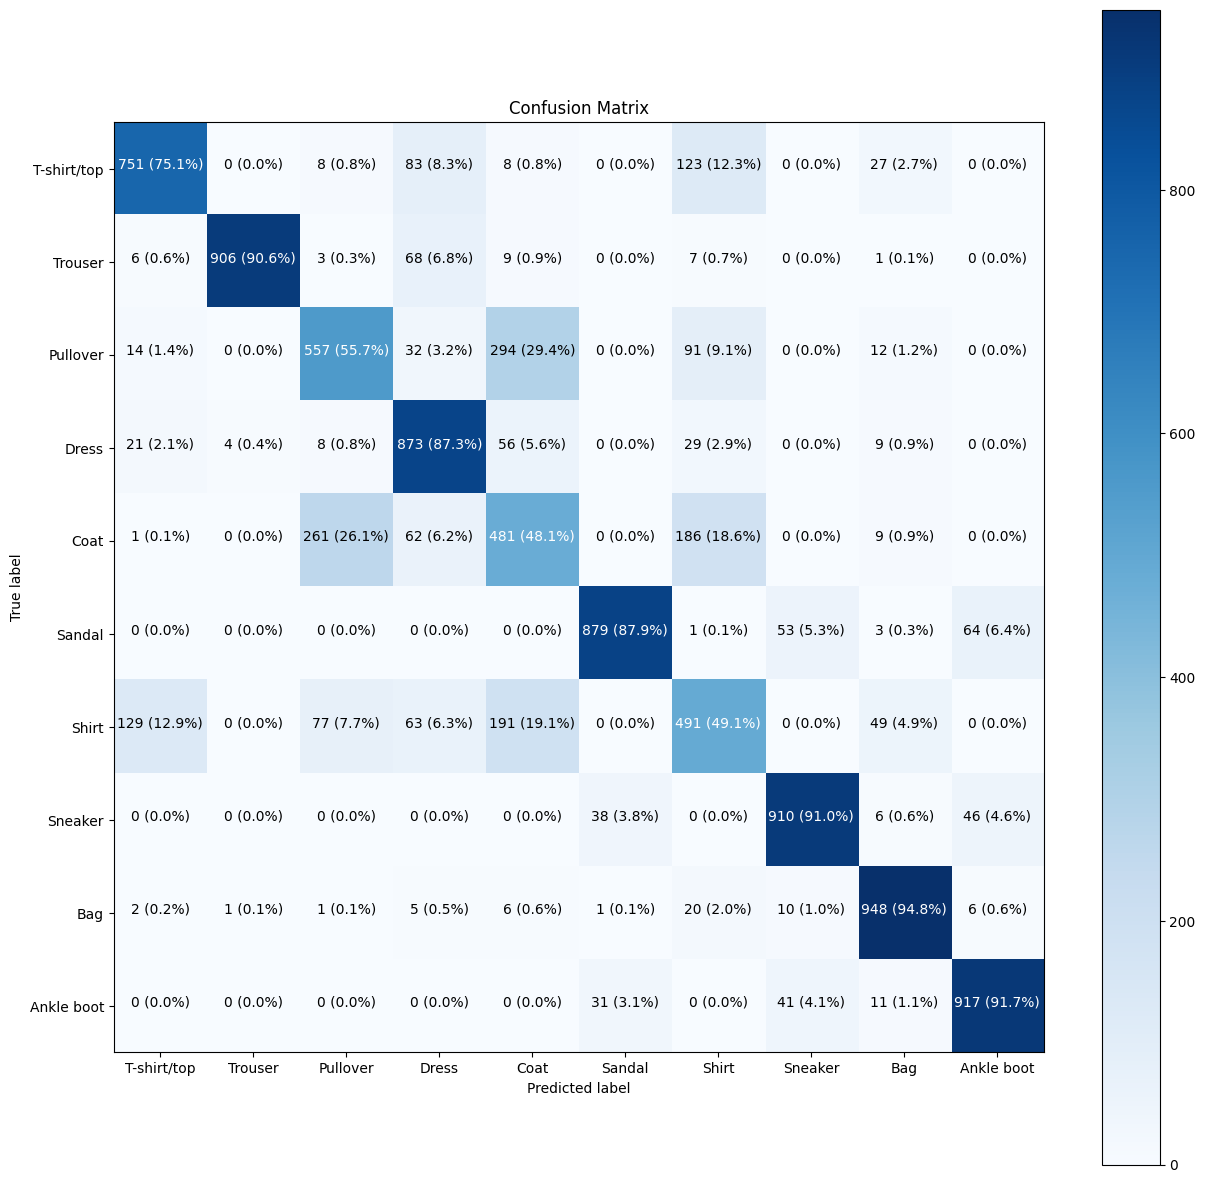

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).


🔑 Note: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),color=color)


1/1 [==============================] - 0s 23ms/step


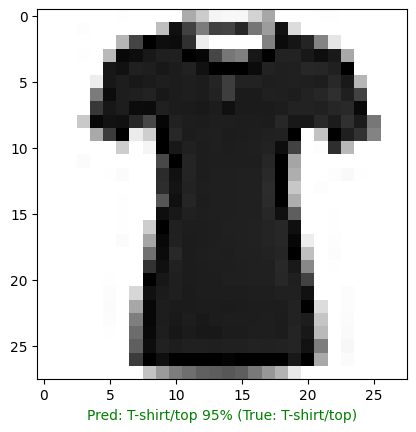

In [ ]:
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?
We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (model_14) using the layers attribute.

In [ ]:
model_14.layers


In [ ]:
model_14.layers[1]


In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.70689404,  0.9255274 , -0.06711083, -0.8937981 ],
        [ 0.11037125,  0.80489945,  0.00674256, -1.3593065 ],
        [-0.01929461,  1.0939516 , -0.0500865 , -1.0465326 ],
        ...,
        [ 0.38568735,  0.5261087 ,  0.05247864,  0.03983001],
        [ 0.15830046,  0.05808913,  0.03516869,  0.00355462],
        [-0.5257036 ,  0.47972724, -0.02431623,  0.2429274 ]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 1.7158178,  0.9000267,  0.0646727, -2.0698483], dtype=float32), (4,))

In [ ]:
model_14.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().

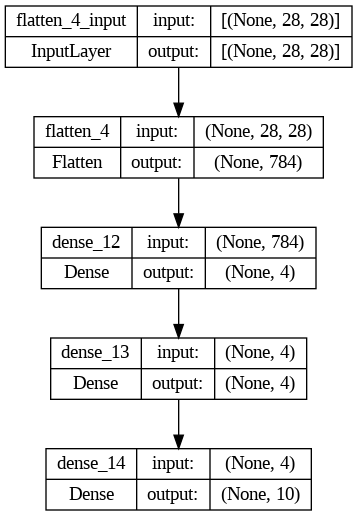

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

## How a model learns (in brief)
Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.